### Feature selection using correlation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data=pd.read_csv('E://DS Projects//Spotify Song Prediction//dataset_processed.csv')

In [7]:
data.head()

,track_id,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,track_name_0,track_name_1,track_name_2,track_name_3,track_name_4,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type_Low,speechiness_type_Medium
0,5SuOikwiRyPMVoIQDJUgSV,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,73,0.185325,-0.305932,0.628394,-0.721328,-1.210476,0.298800,0,1.101557,-0.815926,-0.672445,1.078285,0.928984,-1.142994,0.221660,0,0,1,1,0
1,4qPNDBW1i3p13qLCt0Ki3A,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,55,-0.924888,-0.305932,-0.847891,-1.896382,-1.210476,-1.794228,1,0.234607,1.533645,-0.600612,-0.653979,-0.799395,-1.490909,0.221660,0,0,1,1,0
2,1iJBSr7s7jYXzM8EGcbK5b,0,0,0,0,3,0,0,0,0,3,0,0,0,0,3,57,-0.053284,-0.305932,-0.744089,-1.127618,-1.491364,-0.297440,1,-0.160432,0.021997,-0.849140,-0.474446,-1.366520,-1.529510,0.221660,0,0,1,1,0
3,6lfxq3CG4xtTiEg7opyCyx,0,0,0,0,4,0,0,0,0,4,0,0,0,0,4,71,-0.166111,-0.305932,-1.735968,-2.320198,-1.491364,-2.049645,1,-0.659502,1.503789,-0.435859,-0.323181,-1.277786,1.987275,-2.092538,0,0,1,1,0
4,5vjLSffimiIP26QG5WcN2K,0,0,0,0,5,0,0,0,0,5,0,0,0,0,5,82,-0.206115,-0.305932,0.293923,-0.793026,-0.929587,-0.286864,1,-0.229681,0.702936,-0.849140,-0.886924,-1.185194,-0.074292,0.221660,0,0,1,1,0


In [8]:
data.isna().sum()

track_id                   0
artists_0                  0
artists_1                  0
artists_2                  0
artists_3                  0
artists_4                  0
album_name_0               0
album_name_1               0
album_name_2               0
album_name_3               0
album_name_4               0
track_name_0               0
track_name_1               0
track_name_2               0
track_name_3               0
track_name_4               0
popularity                 0
duration_ms                0
explicit                   0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
track_genre_0              0
track_genre_1              0
track_genre_2              0
speechiness_ty

### We would use correlation for feature selection

track_id is unique to every track.So we would drop this feature. Moreover speechiness column was converted to speechiness_type and then encoded. But for now lets keep the columns.

First separate the dependent and independent features.

In [9]:
X=data.drop(['track_id','popularity'], axis=1)
y=data['popularity']

In [10]:
X.head()

,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,track_name_0,track_name_1,track_name_2,track_name_3,track_name_4,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type_Low,speechiness_type_Medium
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0.185325,-0.305932,0.628394,-0.721328,-1.210476,0.298800,0,1.101557,-0.815926,-0.672445,1.078285,0.928984,-1.142994,0.221660,0,0,1,1,0
1,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,-0.924888,-0.305932,-0.847891,-1.896382,-1.210476,-1.794228,1,0.234607,1.533645,-0.600612,-0.653979,-0.799395,-1.490909,0.221660,0,0,1,1,0
2,0,0,0,0,3,0,0,0,0,3,0,0,0,0,3,-0.053284,-0.305932,-0.744089,-1.127618,-1.491364,-0.297440,1,-0.160432,0.021997,-0.849140,-0.474446,-1.366520,-1.529510,0.221660,0,0,1,1,0
3,0,0,0,0,4,0,0,0,0,4,0,0,0,0,4,-0.166111,-0.305932,-1.735968,-2.320198,-1.491364,-2.049645,1,-0.659502,1.503789,-0.435859,-0.323181,-1.277786,1.987275,-2.092538,0,0,1,1,0
4,0,0,0,0,5,0,0,0,0,5,0,0,0,0,5,-0.206115,-0.305932,0.293923,-0.793026,-0.929587,-0.286864,1,-0.229681,0.702936,-0.849140,-0.886924,-1.185194,-0.074292,0.221660,0,0,1,1,0


Now we would do train-test-split to prevent the overfitting.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=7)

In [12]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(79484, 34) (34065, 34)
(79484,) (34065,)


We would do all the functionalities of features_selection on training data. Later we would just select the features from test data without redoing the correllation test.

Cretaing the heatmap

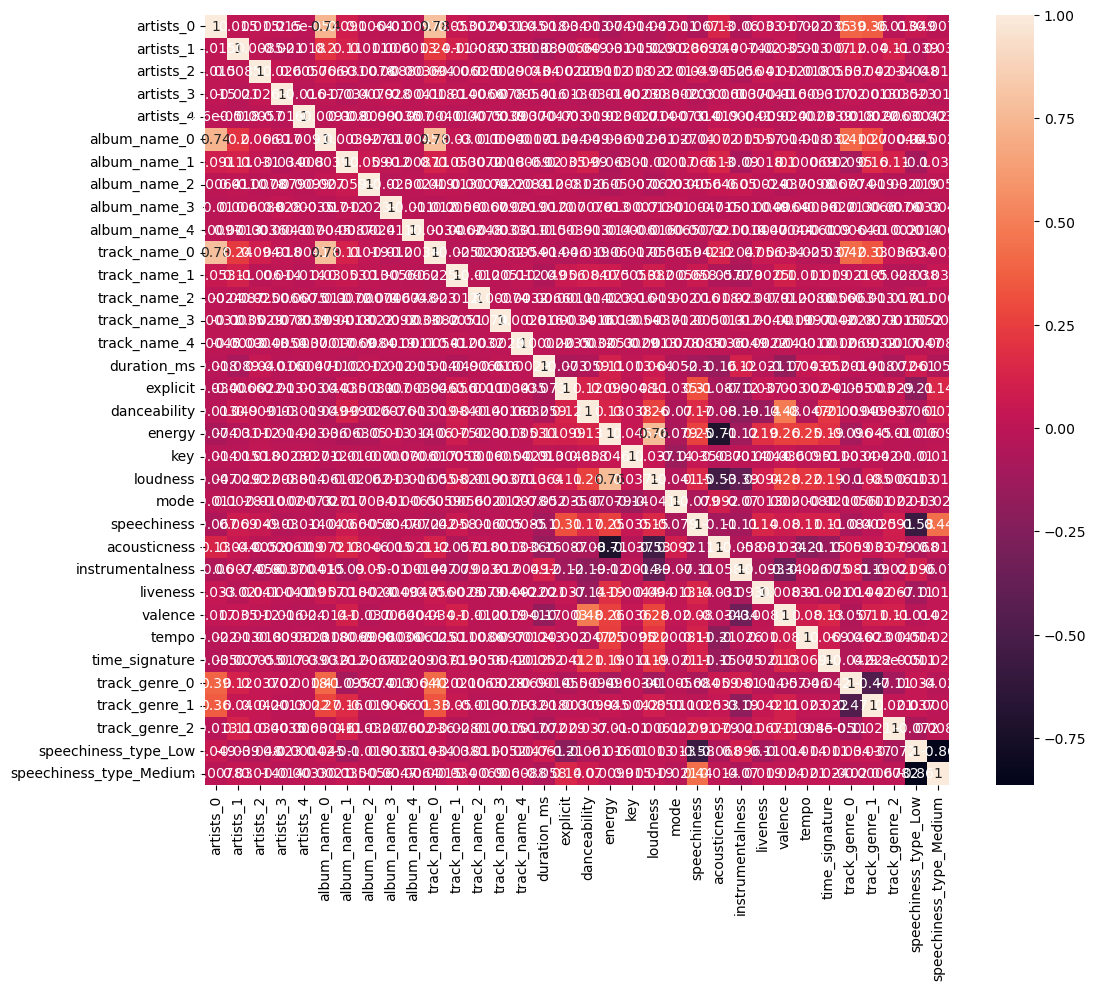

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [15]:
def correlation(dataset,threshold):
    correlated_columns=set()
    correlation_matrix=dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j])>threshold:
                colname=correlation_matrix.columns[i]
                correlated_columns.add(colname)
    return correlated_columns
        

In [16]:
corr_features=correlation(X_train,0.7)
len(set(corr_features))

5

In [17]:
corr_features

{'acousticness',
 'album_name_0',
 'loudness',
 'speechiness_type_Medium',
 'track_name_0'}

In [18]:
X_train_corr=X_train.copy()
X_test_corr=X_test.copy()

In [19]:
X_train_corr.drop(corr_features, axis=1, inplace=True)
X_test_corr.drop(corr_features, axis=1, inplace=True)

In [20]:
print(X_train_corr.shape, X_test_corr.shape)

(79484, 29) (34065, 29)


In [21]:
X_train_corr.isna().sum()

artists_0               0
artists_1               0
artists_2               0
artists_3               0
artists_4               0
album_name_1            0
album_name_2            0
album_name_3            0
album_name_4            0
track_name_1            0
track_name_2            0
track_name_3            0
track_name_4            0
duration_ms             0
explicit                0
danceability            0
energy                  0
key                     0
mode                    0
speechiness             0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
track_genre_0           0
track_genre_1           0
track_genre_2           0
speechiness_type_Low    0
dtype: int64

### Model training and performance

In [22]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge

In [23]:
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()
xgbreg=XGBRegressor()
xgbrfreg=XGBRFRegressor()
dtree=DecisionTreeRegressor()
bayridge=BayesianRidge()

In [37]:
def model(name):
    name.fit(X_train_corr,y_train)
    prediction=name.predict(X_test_corr)
    residual=y_test-prediction
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,2,1)
    plt.scatter(y_test,prediction)
    
    plt.subplot(1,2,2)
    sns.distplot(residual, hist=False, kde=True)
    plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


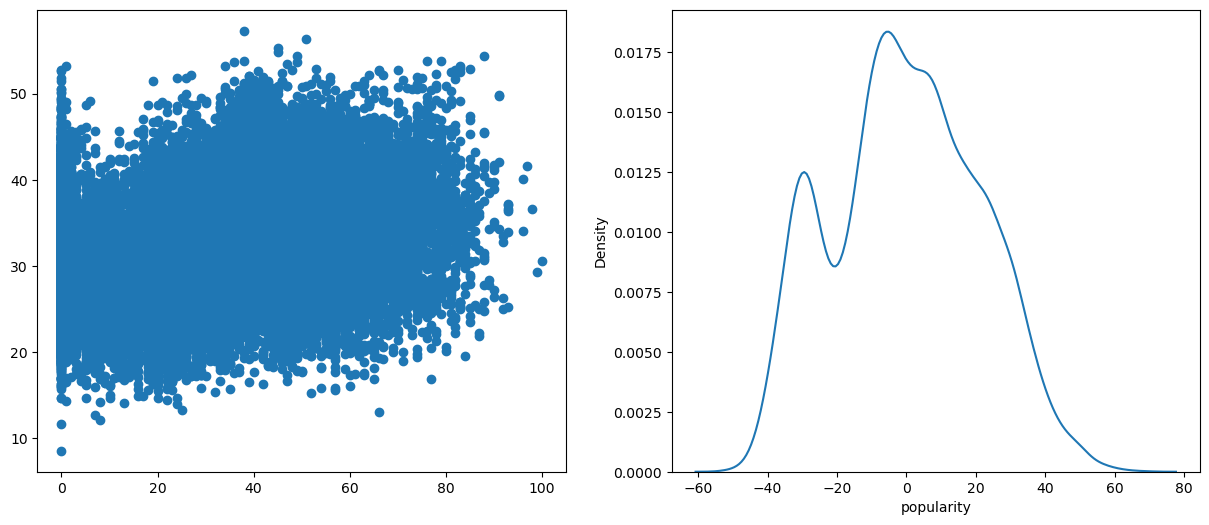

In [38]:
model(lr)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


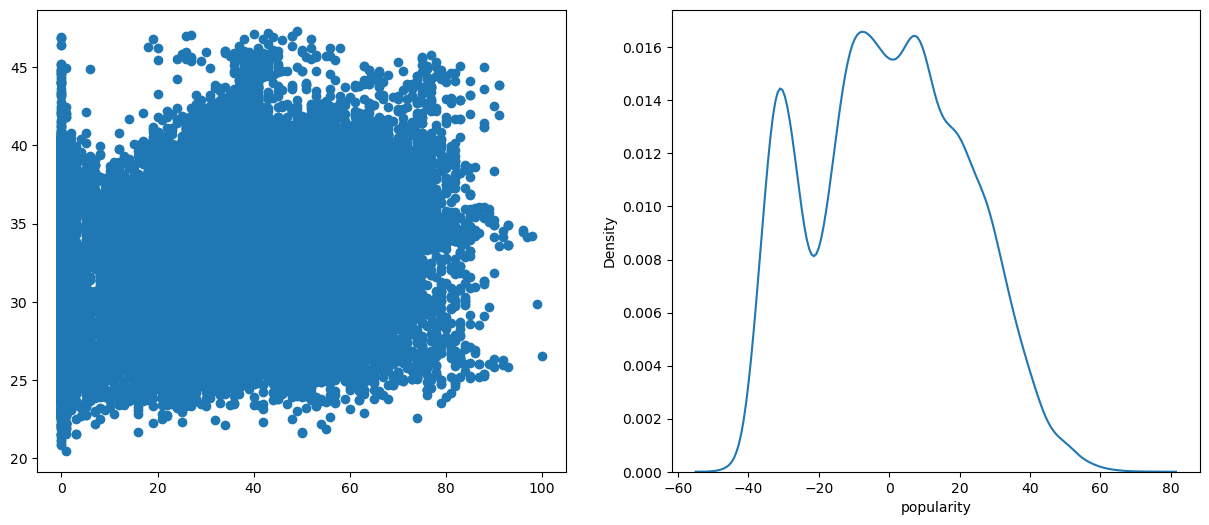

In [26]:
model(lasso)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


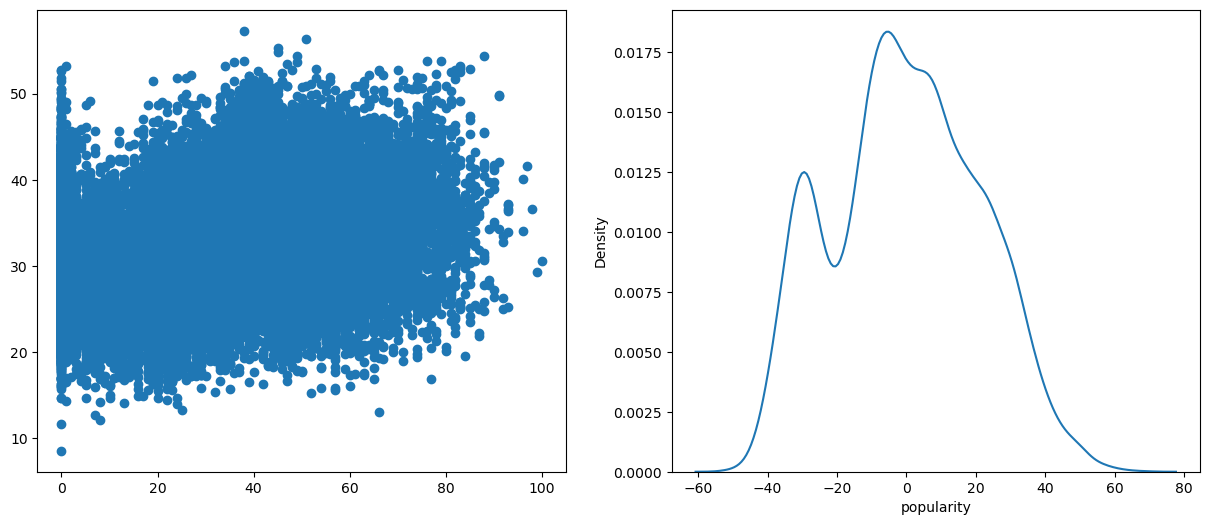

In [27]:
model(ridge)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


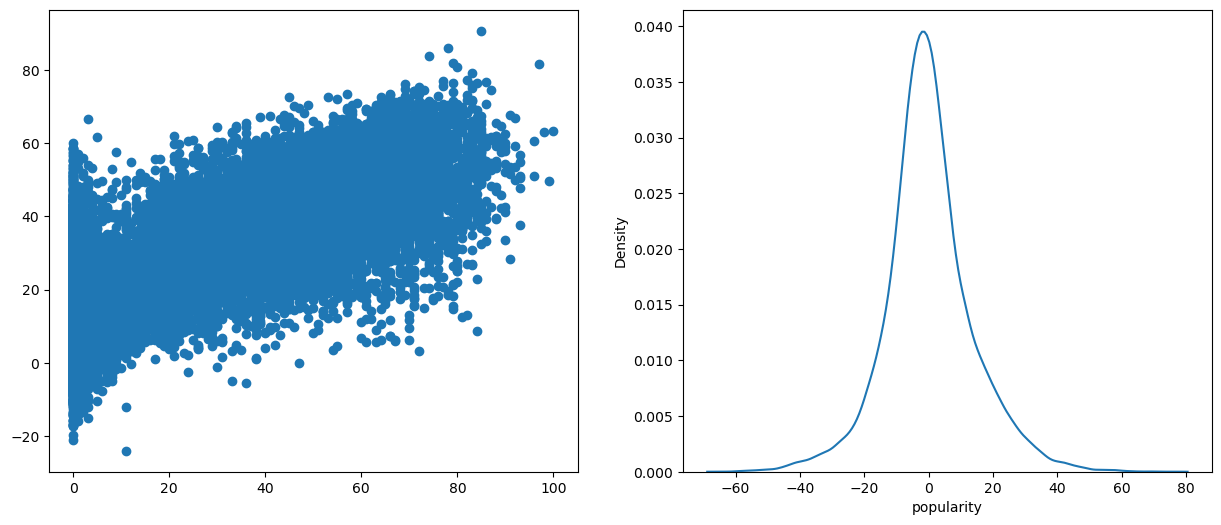

In [39]:
model(xgbreg)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


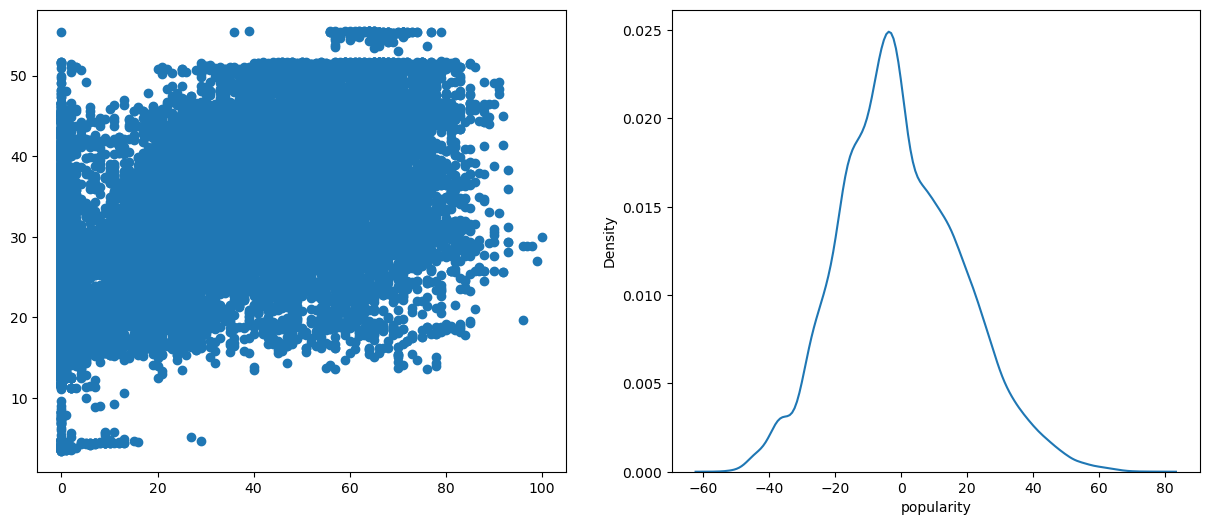

In [40]:
model(xgbrfreg)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


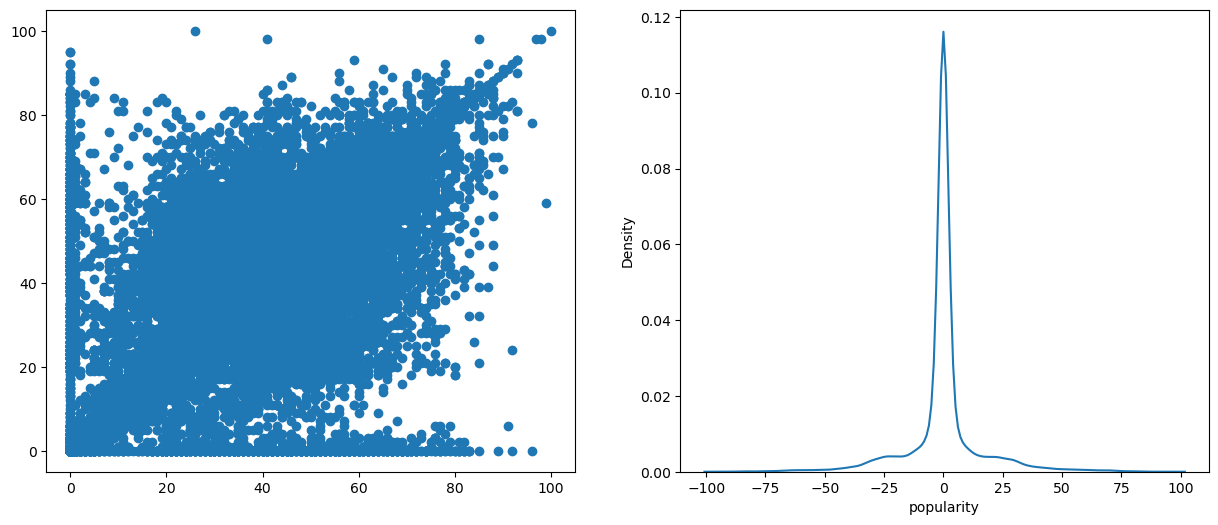

In [41]:
model(dtree)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


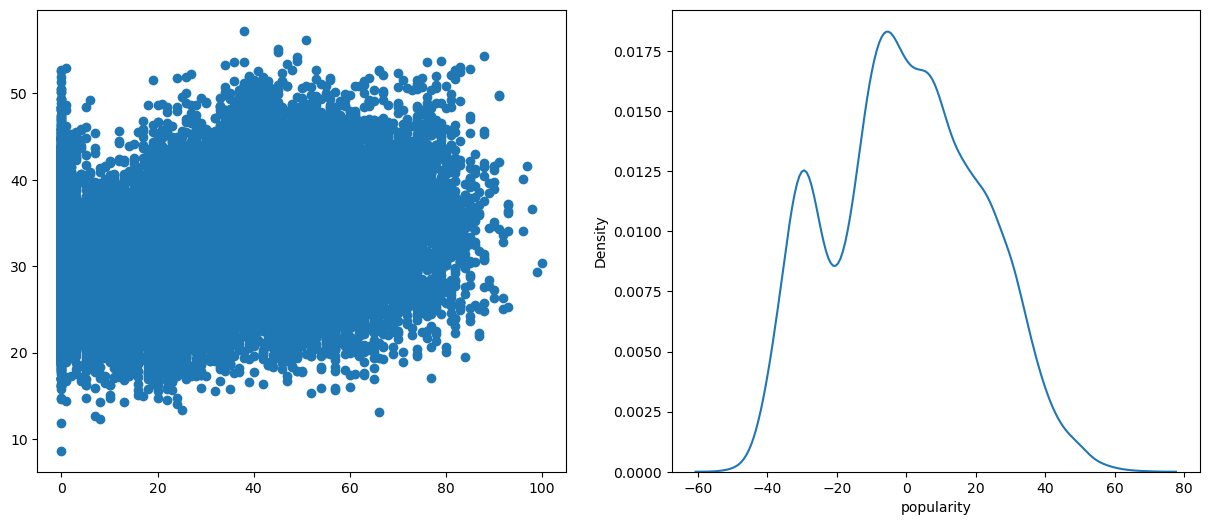

In [42]:
model(bayridge)

##### Comments:
1. Xgboost is giving the most promising results among the models
2. Linear models do not perform well
3. Decission tree is also performing well

### Performance metrics

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [44]:
def metrics(model_name):
    prediction=model_name.predict(X_test_corr)
    mse=mean_squared_error(y_test, prediction)
    abmse=mean_absolute_error(y_test, prediction)
    print(model_name)
    print('Mean Squared Error:', mse,'Absolute Mse: ', abmse)
    score=r2_score(y_test, prediction)
    print('r2 score:', score)

In [45]:
metrics(lr)

LinearRegression()
Mean Squared Error: 455.34881188924925 Absolute Mse:  17.556276072932498
r2 score: 0.0778336007118745


In [46]:
metrics(lasso)

Lasso()
Mean Squared Error: 465.8949972235854 Absolute Mse:  17.976373978453715
r2 score: 0.05647560547380759


In [47]:
metrics(ridge)

Ridge()
Mean Squared Error: 455.34882005933 Absolute Mse:  17.556298211384163
r2 score: 0.07783358416593489


In [48]:
metrics(xgbreg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Mean Squared Error: 186.8763348321399 Absolute Mse:  10.006476541080044
r2 score: 0.6215405150848814


In [49]:
metrics(xgbrfreg)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)
Mean Squared Error: 343.3948055888688 Absolute Mse:  14.755474713830964
r2 score: 0.30456137550842366


In [50]:
metrics(dtree)

DecisionTreeRegressor()
Mean Squared Error: 236.50005871128724 Absolute Mse:  7.7448701012769705
r2 score: 0.5210432049479843


In [51]:
metrics(bayridge)

BayesianRidge()
Mean Squared Error: 455.3577935141932 Absolute Mse:  17.56172507935791
r2 score: 0.0778154112436733


In [52]:
algos=[lr, lasso, ridge, xgbreg, xgbrfreg, dtree, bayridge]
MSE=[]
ABMSE=[]
R2_score=[]
for feature in algos:
    prediction=feature.predict(X_test_corr)
    mse=mean_squared_error(y_test, prediction)
    abmse=mean_absolute_error(y_test, prediction)
    score=r2_score(y_test, prediction)
    MSE.append(mse)
    ABMSE.append(abmse)
    R2_score.append(score)

In [53]:
algosname=['Linear Regression', 'Lasso', 'Ridge', 'XGBoost', 'XGBoostRandomForest','DecisionTree','BayesianRidge']

In [54]:
metrics=pd.DataFrame(list(zip(algosname,MSE,ABMSE,R2_score)), columns=['Model','MSE', 'ABMSE', 'R2_score'])

In [55]:
metrics

,Model,MSE,ABMSE,R2_score
0,Linear Regression,455.348812,17.556276,0.077834
1,Lasso,465.894997,17.976374,0.056476
2,Ridge,455.348820,17.556298,0.077834
3,XGBoost,186.876335,10.006477,0.621541
4,XGBoostRandomForest,343.394806,14.755475,0.304561
5,DecisionTree,236.500059,7.744870,0.521043
6,BayesianRidge,455.357794,17.561725,0.077815


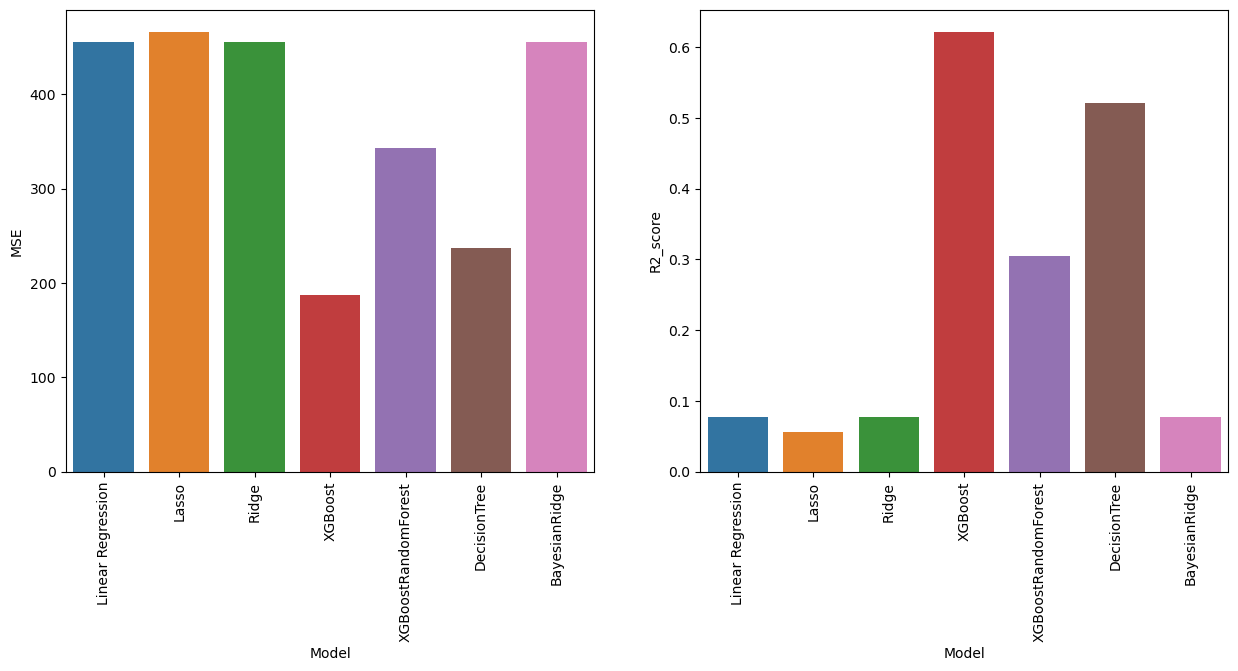

In [56]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x='Model', y='MSE', data=metrics)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='Model', y='R2_score', data=metrics)
plt.xticks(rotation=90)
plt.show()

###### Comments:
1. From the above performance metrics, we see that the XGBoost (Regressor) and Decission Tree performs much better than the rest of the models.
2. XGBoost has the highest r2_score and the least mean squared error among the models, 0.62 and 186.87 correspondingly.
3. We would use this XGBoost model for future predictions.

##### Possible reason for the decission tree and xgboost model performing better than the linear models.
It could be because both decission tree and XgBoost  use tree based models for predictions rather than fitting a line or a curve to the data points.

## Pickle the model file for deployment 

In [57]:
import pickle

In [59]:
pickle.dump(xgbreg,open('spotifyxgb.pkl','wb'))